In [152]:
import configparser
import json
import numpy as np
import matplotlib.pyplot as plt
import scipy

# small difference the biggest element and the second biggest

In [2]:
example = 17
config = configparser.ConfigParser()
config.read('random_config.ini')
x_real = config[str(example)]['x'].replace('[', '').replace('\n', ' ').replace(']', '').replace('  ', ' ').split(' ')
x_real = np.array([float(el) for el in x_real if el])
x_real = (x_real/np.linalg.norm(x_real))**2
x_real.sort()
print(x_real)
print(np.sum(x_real))
print(np.max(x_real)*0.3)

[0.00089757 0.07333918 0.07427212 0.07604999 0.11587535 0.11822517
 0.1233468  0.41799382]
0.9999999999999999
0.12539814580717082


In [3]:
with open('random_data.json') as json_file:
    data = json.load(json_file)
x_hhl = data['example '+str(example)]['20']['x_hhl'].replace('[', '').replace(']', '').split(',')
x_hhl = np.array([float(el) for el in x_hhl if el])
# x_hhl = (x_hhl/np.linalg.norm(x_hhl))**2
x_hhl.sort()
print(np.sum(x_hhl))
print(x_hhl)
# x_hhl = (x_hhl/np.linalg.norm(x_hhl))**2
# print(x_hhl)

1.0
[0.00097656 0.01757812 0.04003906 0.04296875 0.125      0.21630859
 0.2578125  0.29931641]


# small difference the biggest element and the second biggest

In [4]:
example = 15
config = configparser.ConfigParser()
config.read('random_config.ini')
x_real = config[str(example)]['x'].replace('[', '').replace('\n', ' ').replace(']', '').replace('  ', ' ').split(' ')
x_real = np.array([float(el) for el in x_real if el])
x_real = (x_real/np.linalg.norm(x_real))**2
x_real.sort()
print(np.sum(x_real))
print(x_real)
print(np.max(x_real)*0.4)

1.0000000000000002
[0.00031999 0.00125688 0.00164141 0.00440629 0.01088908 0.02140367
 0.03960437 0.06453942 0.06616495 0.071664   0.07878307 0.07991153
 0.11187928 0.13320264 0.14984397 0.16448946]
0.0657957835912976


In [5]:
with open('random_data.json') as json_file:
    data = json.load(json_file)
x_hhl = data['example '+str(example)]['20']['x_hhl'].replace('[', '').replace(']', '').split(',')
x_hhl = np.array([float(el) for el in x_hhl])
# x_hhl = (x_hhl/np.linalg.norm(x_hhl))**2
x_hhl.sort()
print(np.sum(x_hhl))
print(x_hhl)

1.0
[0.00097656 0.00146484 0.00341797 0.00537109 0.00585938 0.01123047
 0.02148438 0.05175781 0.06835938 0.08154297 0.08447266 0.08496094
 0.11962891 0.14306641 0.14501953 0.17138672]


In [157]:
def get_x_real(example):
    config = configparser.ConfigParser()
    config.read('random_config.ini')
    x_real = config[str(example)]['x'].replace('[', '').replace('\n', ' ').replace(']', '').split(' ')
    x_real = np.array([float(el) for el in x_real if el])
    x_real = (x_real/np.linalg.norm(x_real))**2
    x_real.sort()
    A = config[str(example)]['A']
    # A = np.array([[float(number) for number in list_.replace('[', '').replace(']', '').replace('\n', '')
    #                .replace('  ', ' ').split(' ') if number] for list_ in A.split('\n')]).flatten()
    # A = A.split('\n')
    A = ([[float(number) for number in list_.replace('[', '').replace(']', '')
           .replace('  ', ' ').split(' ') if number] for list_ in A.split('\n')])
    A = np.array([item for sublist in A for item in sublist])
    A = A.reshape((int(np.sqrt(len(A))), int(np.sqrt(len(A)))))
    print(scipy.linalg.ishermitian(A))
    return x_real, x_real[-3:-1], np.linalg.det(A)

def get_x_hhl(example):
    with open('random_data.json') as json_file:
        data = json.load(json_file)
    x_hhl = data['example '+str(example)]['20']['x_hhl'].replace('[', '').replace(']', '').split(',')
    x_hhl = np.array([float(el) for el in x_hhl])
    x_hhl.sort()
    return x_hhl

def get_x_hhl_norm(example):
    with open('random_data.json') as json_file:
        data = json.load(json_file)
    x_hhl = data['example '+str(example)]['20']['x_hhl'].replace('[', '').replace(']', '').split(',')
    x_hhl = np.array([float(el) for el in x_hhl])
    x_hhl = (x_hhl/np.linalg.norm(x_hhl))**2
    x_hhl.sort()
    return x_hhl

def get_error(vect, real_x_norm):
    mse = (np.square(vect - real_x_norm)).mean()
    abs_err = np.mean([np.abs((v-r)/r) for v,r in zip(vect, real_x_norm)])
    return mse, abs_err

In [158]:
mses = []
mses_normed = []
rel_errs = []
norm_rel_errs = []
dets = []

for i in range(40):
    x_real, two_last, det = get_x_real(i)
    x_hhl = get_x_hhl(i)
    x_hhl_norm = get_x_hhl_norm(i)
    if len(np.zeros(len(x_real) - len(x_hhl))) > 0:
            x_hhl = np.concatenate((x_hhl, np.zeros(len(x_real) - len(x_hhl))))
    if len(np.zeros(len(x_real) - len(x_hhl_norm))) > 0:
            x_hhl_norm = np.concatenate((x_hhl_norm, np.zeros(len(x_real) - len(x_hhl_norm))))
    mse, rel_err = get_error(x_hhl, x_real)
    mses.append(mse)
    rel_errs.append(rel_err)
    mse_normed, rel_err_normed = get_error(x_hhl_norm, x_real)
    mses_normed.append(mse_normed)
    norm_rel_errs.append(rel_err_normed)
    dets.append(det)
    print(f"{i} mse {np.round(mse, 4)}, NORMED mse {np.round(mse_normed, 4)}",
          f"el_err {np.round(rel_err, 4)}, NORMED rel_err {np.round(rel_err_normed, 4)}",
         f"min {np.min(x_real)}, det {np.round(det,6)}")

True
0 mse 0.1298, NORMED mse 0.1836 el_err 0.7329, NORMED rel_err 0.8718 min 0.43498536946787547, det 0.018494
True
1 mse 0.0044, NORMED mse 0.0035 el_err 0.9541, NORMED rel_err 0.2148 min 0.013939162439065197, det 0.018288
True
2 mse 0.0097, NORMED mse 0.0029 el_err 2.812, NORMED rel_err 0.8505 min 0.0002020125502029815, det 7.1e-05
True
3 mse 0.003, NORMED mse 0.0197 el_err 0.3781, NORMED rel_err 0.7311 min 0.018864334919822347, det 0.064548
True
4 mse 0.0001, NORMED mse 0.0161 el_err 0.2158, NORMED rel_err 0.6665 min 0.02108897716642451, det 0.021391
True
5 mse 0.003, NORMED mse 0.003 el_err 4.7661, NORMED rel_err 0.9643 min 0.0003176603745229226, det 0.0
True
6 mse 0.0065, NORMED mse 0.0475 el_err 0.3158, NORMED rel_err 0.7901 min 0.05099019856180242, det 0.041059
True
7 mse 0.0038, NORMED mse 0.0015 el_err 0.6681, NORMED rel_err 0.4126 min 0.01397644377907291, det 3e-05
True
8 mse 0.0029, NORMED mse 0.0 el_err 427.6278, NORMED rel_err 25.0971 min 6.273161790631493e-05, det 0.0005

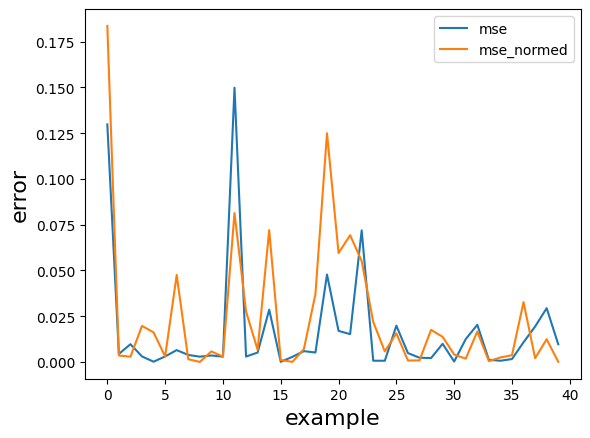

In [97]:
plt.plot(mses, label='mse')
plt.plot(mses_normed, label='mse_normed')
plt.legend()
plt.xlabel('example', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.show()

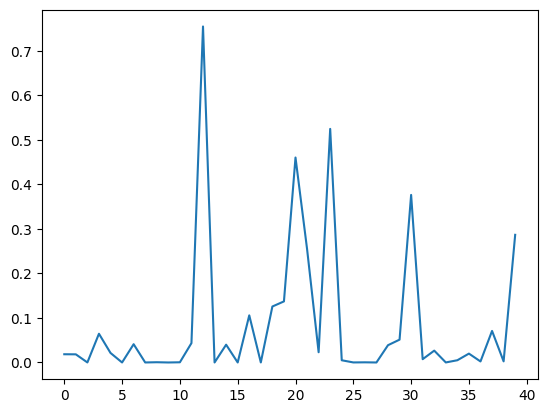

In [117]:
plt.plot(dets)

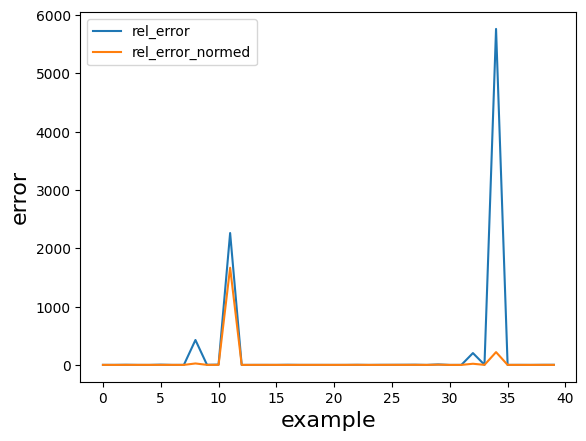

In [98]:
plt.plot(rel_errs, label='rel_error')
plt.plot(norm_rel_errs, label='rel_error_normed')
plt.legend()
plt.xlabel('example', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.show()

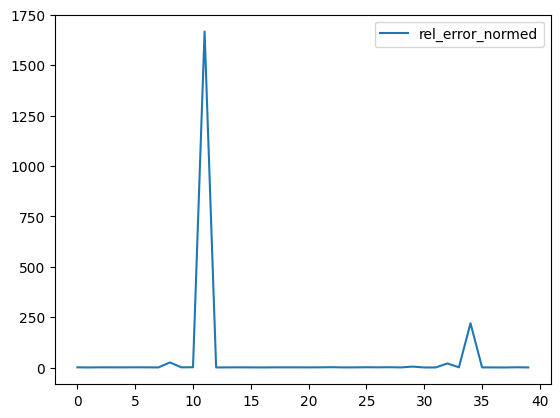

In [10]:
plt.plot(norm_rel_errs, label='rel_error_normed')
plt.legend()
plt.show()

In [148]:
all_mse = []
all_mse_norm=[]
all_rel = []
all_rel_norm = []
for percent in np.arange(0, 1.2, 0.1):
    print(max_val*percent)
    mses = []
    mses_normed = []
    rel_errs = []
    norm_rel_errs = []
    for i in range(40):
        x_real, two_last, det = get_x_real(i)
        # mean_val = np.mean(x_real)
        # std_val = np.std(x_real)
        max_val = np.max(x_real)
        # idxs_in_condition = [idx for idx in range(len(x_real)) if mean_val-std_val <= x_real[idx] <= mean_val+std_val]
        idxs_in_condition = [idx for idx in range(len(x_real)) if np.abs(x_real[idx]) >= max_val*percent]
        if idxs_in_condition:
            x_hhl = get_x_hhl(i)
            x_hhl_norm = get_x_hhl_norm(i)
            if len(np.zeros(len(x_real) - len(x_hhl))) > 0:
                    x_hhl = np.concatenate((x_hhl, np.zeros(len(x_real) - len(x_hhl))))
            if len(np.zeros(len(x_real) - len(x_hhl_norm))) > 0:
                    x_hhl_norm = np.concatenate((x_hhl_norm, np.zeros(len(x_real) - len(x_hhl_norm))))
            x_real = np.array([x_real[idx] for idx in idxs_in_condition])
            x_hhl = np.array([x_hhl[idx] for idx in idxs_in_condition])
            x_hhl_norm = np.array([x_hhl_norm[idx] for idx in idxs_in_condition])
            mse, rel_err = get_error(x_hhl, x_real)
            mses.append(mse)
            rel_errs.append(rel_err)
            mse_normed, rel_err_normed = get_error(x_hhl_norm, x_real)
            mses_normed.append(mse_normed)
            norm_rel_errs.append(rel_err_normed)
            # print(f" {i} mse {np.round(mse, 4)}, NORMED mse {np.round(mse_normed, 4)}",
            #       f"el_err {np.round(rel_err, 4)}, NORMED rel_err {np.round(rel_err_normed, 4)}",
            #      f"min {np.min(x_real)}")
    # print(mses)
    all_mse.append(mses)
    all_mse_norm.append(mses_normed)
    all_rel.append(rel_errs)
    all_rel_norm.append(norm_rel_errs)

0.0
0.09502174829009641
0.19004349658019282
0.2850652448702893
0.38008699316038563
0.47510874145048204
0.5701304897405786
0.6651522380306749
0.7601739863207713
0.8551957346108677
0.9502174829009641
1.0452392311910605


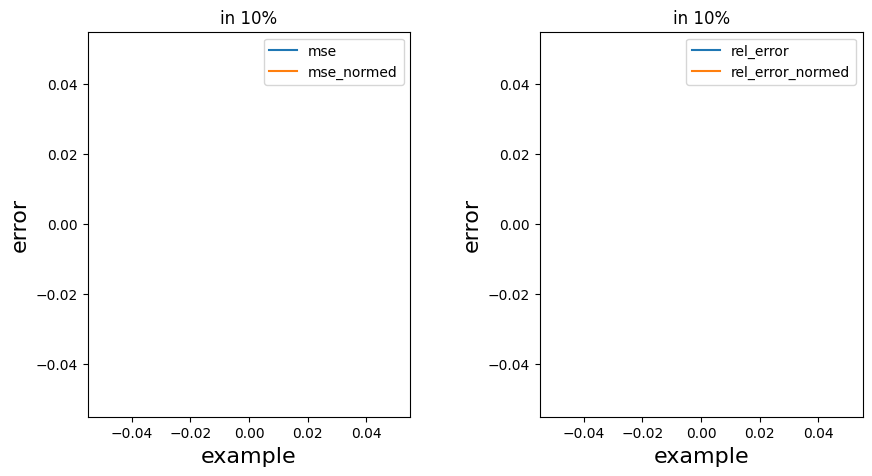

In [149]:
plt.figure(figsize=(10,5))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.subplot(1,2,1)
plt.plot(mses, label='mse')
plt.plot(mses_normed, label='mse_normed')
plt.legend()
plt.xlabel('example', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.title("in 10%")
# plt.show()

plt.subplot(1,2,2)
plt.plot(rel_errs, label='rel_error')
plt.plot(norm_rel_errs, label='rel_error_normed')
plt.legend()
plt.xlabel('example', fontsize=16)
plt.ylabel('error', fontsize=16)
plt.title("in 10%")
plt.show()

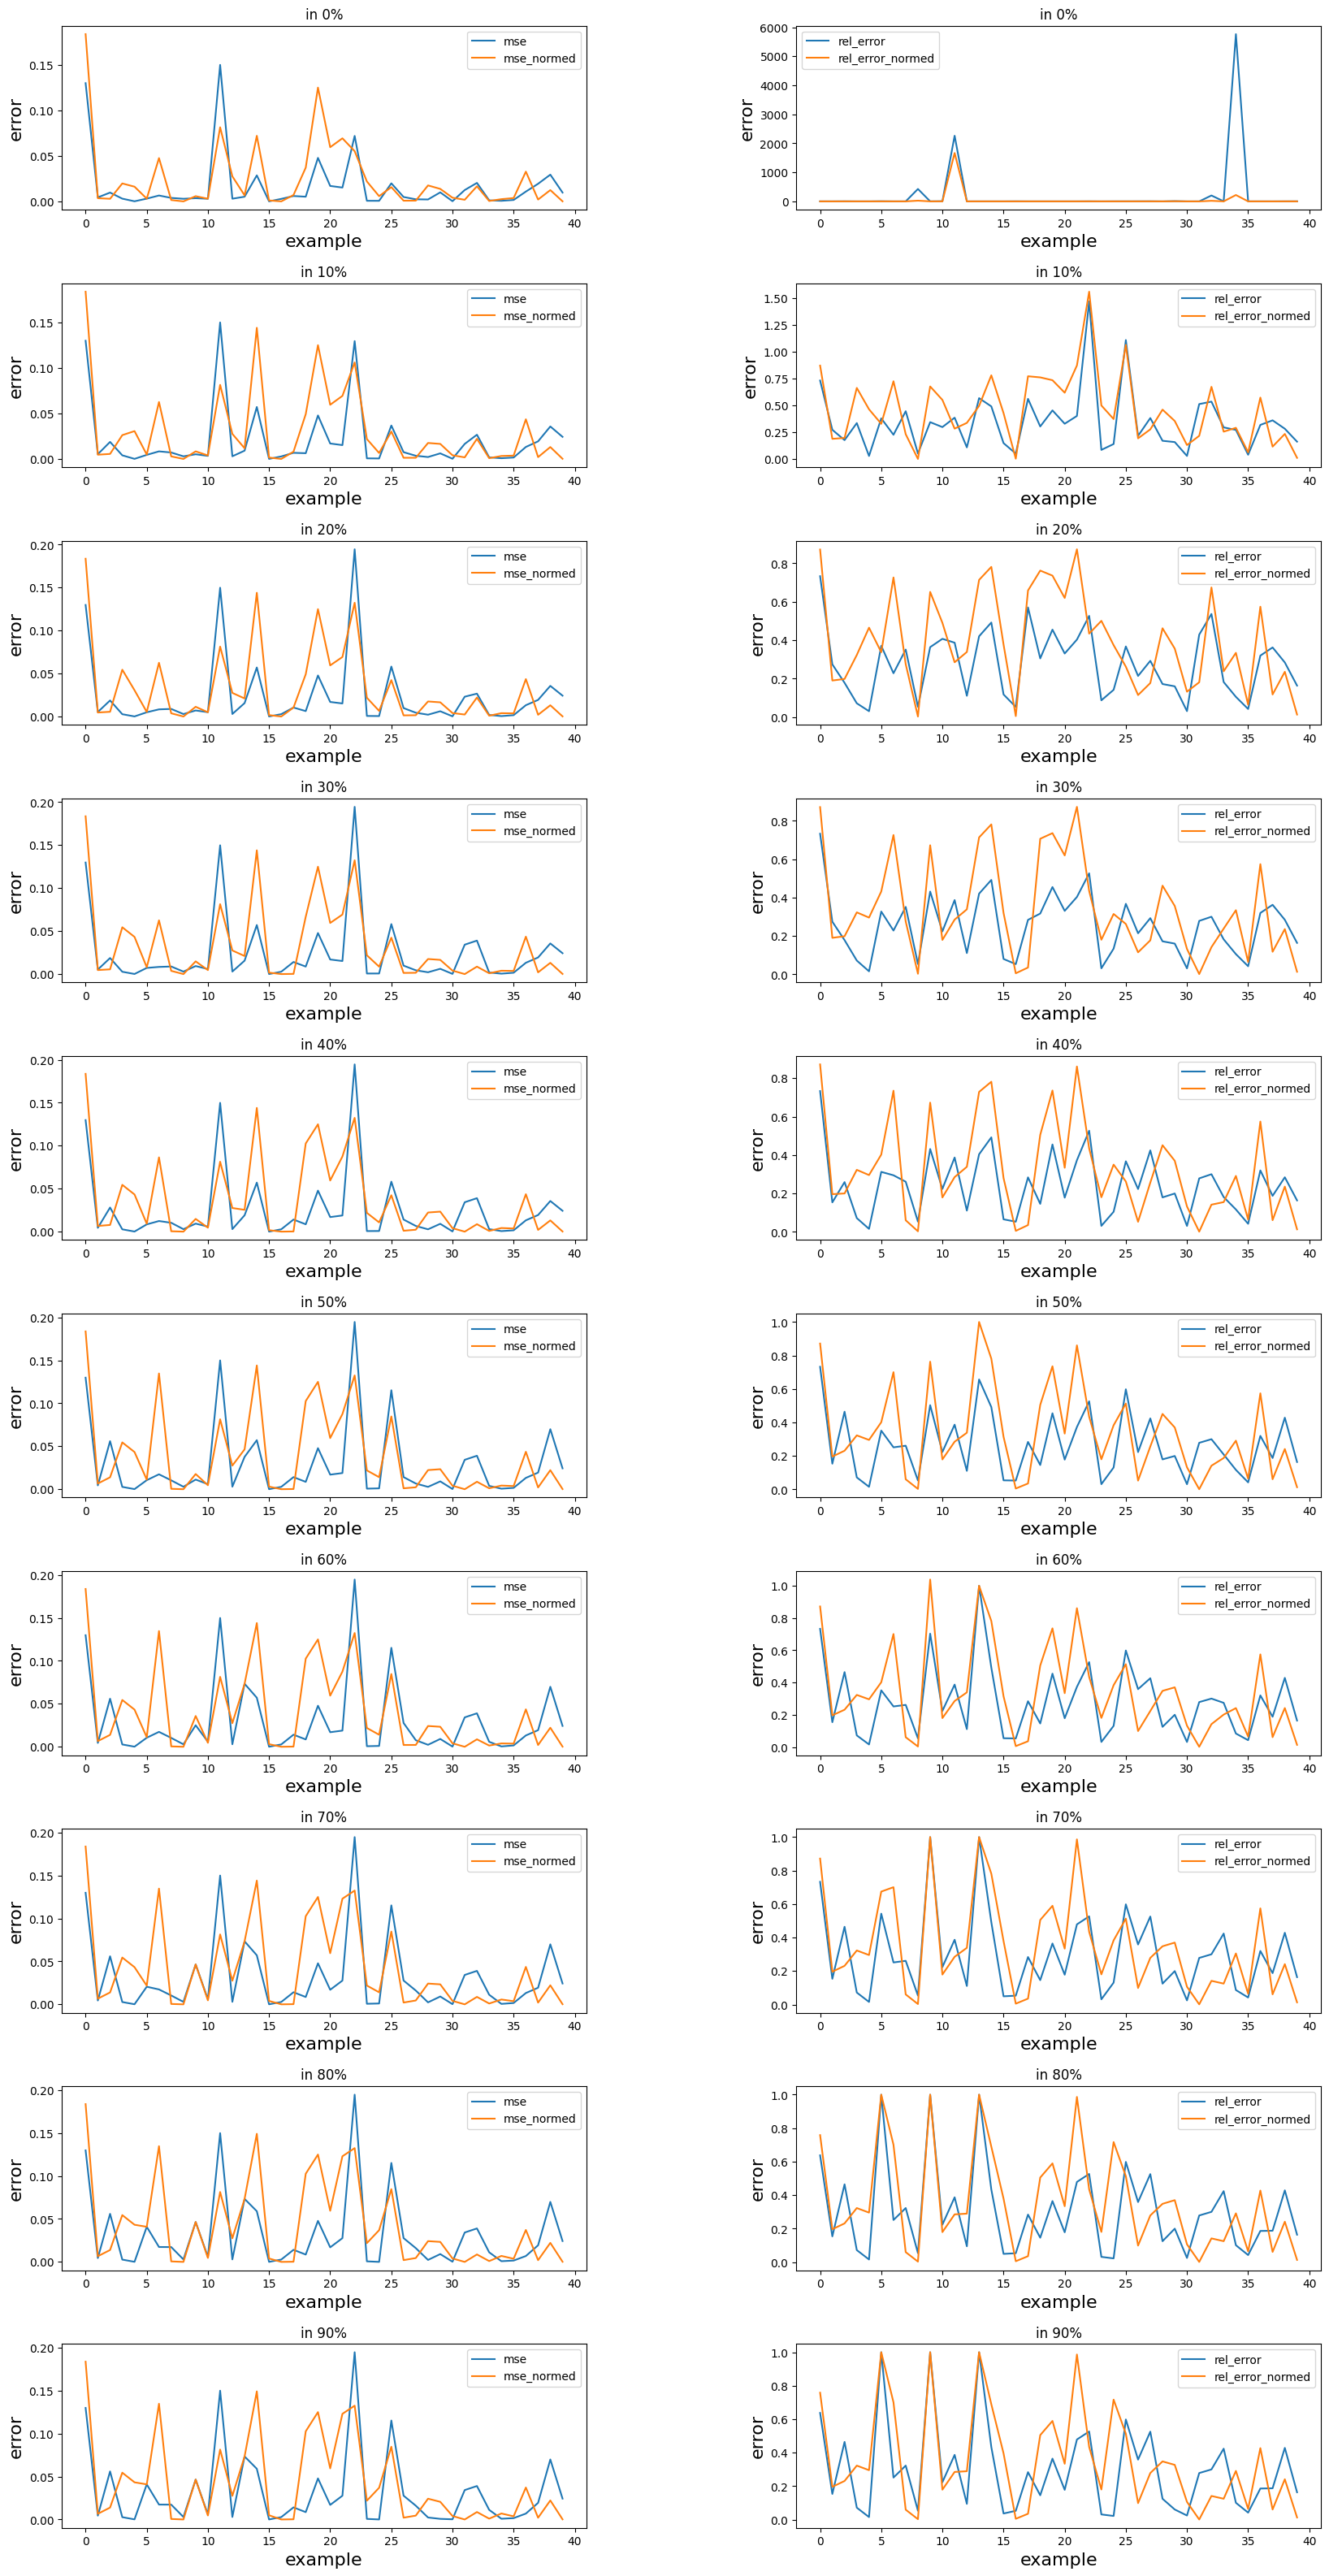

In [150]:
plt.figure(figsize=(20,40))
plt.subplots_adjust(hspace=0.4, wspace=0.4)
i = 0
for persentage, mses, mses_norm, rels, rels_norm in zip(np.arange(0,100,10), all_mse, all_mse_norm, all_rel, all_rel_norm):
    i+=1
    plt.subplot(10,2,i)
    plt.plot(mses, label='mse')
    plt.plot(mses_norm, label='mse_normed')
    plt.legend()
    plt.xlabel('example', fontsize=16)
    plt.ylabel('error', fontsize=16)
    plt.title(f"in {persentage}%")
    
    i+=1

    plt.subplot(10,2,i)
    plt.plot(rels, label='rel_error')
    plt.plot(rels_norm, label='rel_error_normed')
    plt.legend()
    plt.xlabel('example', fontsize=16)
    plt.ylabel('error', fontsize=16)
    plt.title(f"in {persentage}%")
    